In [4]:
import numpy as np     
import matplotlib.pyplot as plt  
import math
from scipy import stats    
from iminuit import Minuit
import sys    
import glob


sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax 

exp_all = glob.glob('Data/exp_*.txt')

for i in range(len(exp_all)):
    exp_all[i] = np.loadtxt(exp_all[i])


(array([-4.4725, -4.1625, -3.9275, -3.7475, -3.63  ]),
 array([2.75068695, 2.75068695, 2.75068695, 2.75068695, 2.75068695]))

In [ ]:
def extract_data(data):
    t = []
    s = []

    for point in range(len(data)):
        t_data_points = data[point][0]
        t.append(t_data_points)
    
        s_data_points = data[point][1]
        s.append(s_data_points)
        
        
        
    x = []
        
    
    # Define the start and end of the interval 
    start = 0
    end = len(s)


    k = 0
    
    for k in range(start, end):
        if s[k] >= 2.00000000000:

            if s[k] <= 2.00000000000:
                break
                
            x.append(k)
            

    x_array = np.array(x)


    slice_sizes = []
    slices = []
    
    for i in range(len(x_array)-1):
        if x_array[i] + 1 != x_array[i+1]:
            #print(i)
            slice_sizes.append(i)



    søjle1 = x_array[:slice_sizes[0]+1]
    søjle2 = x_array[1 + slice_sizes[0]:slice_sizes[1]+1]
    søjle3 = x_array[1 + slice_sizes[1]:slice_sizes[2]+1]
    søjle4 = x_array[1 + slice_sizes[2]:slice_sizes[3]+1]
    søjle5 = x_array[1 + slice_sizes[3]:]


    # Extract the middle indexes of each of the søjler
    middle1 = math.floor((len(søjle1) - 1)/2)
    middle2 = len(søjle1) + math.floor((len(søjle2) - 1)/2)
    middle3 = len(søjle1) + len(søjle2) + math.floor((len(søjle3) - 1)/2)
    middle4 = len(søjle1) + len(søjle2)+ len(søjle3) + math.floor((len(søjle4) - 1)/2)
    middle5 = len(søjle1) + len(søjle2)+ len(søjle3) + len(søjle4) + math.floor((len(søjle5) - 1)/2)

       
    t_results = np.array([t[x_array[middle1]], t[x_array[middle2]], t[x_array[middle3]], 
                          t[x_array[middle4]], t[x_array[middle5]]])
    s_results = np.array([s[x_array[middle1]], s[x_array[middle2]], s[x_array[middle3]], 
                          s[x_array[middle4]], s[x_array[middle5]]])
   

    
    #plt.plot(t,s)
    #plt.show()
        
    return t_results, s_results



In [6]:
def quadratic_model(x, a, b, c):
    return 1/2*a*x**2 + b*x + c

In [22]:
results_t = []
results_s = []


for i in range(len(exp_all)):
    t, s = extract_data(exp_all[i])
    results_t.append(t)
    results_s.append(s) 




print(results_t)


[array([-4.4725, -4.1625, -3.9275, -3.7475, -3.63  ]), array([-3.73   , -3.4225 , -3.18875, -3.0075 , -2.89   ]), array([-3.9375 , -3.6325 , -3.39875, -3.22   , -3.10375]), array([-4.1475 , -3.84125, -3.60875, -3.43   , -3.31375]), array([-4.26125, -3.955  , -3.7225 , -3.54375, -3.4275 ]), array([-4.275  , -3.96875, -3.73625, -3.5575 , -3.44125]), array([-4.42   , -4.1125 , -3.88   , -3.70125, -3.585  ]), array([-4.385  , -4.07875, -3.84625, -3.6675 , -3.55   ]), array([-4.165  , -3.8575 , -3.62375, -3.44375, -3.32625]), array([-3.9175 , -3.61   , -3.37625, -3.1975 , -3.08125]), array([-4.29375, -3.9875 , -3.755  , -3.57625, -3.46   ]), array([-4.255  , -3.94875, -3.71625, -3.5375 , -3.42125]), array([-4.2825 , -3.9775 , -3.745  , -3.56625, -3.44875]), array([-3.71125, -3.40375, -3.17   , -2.99   , -2.87125]), array([-4.1625 , -3.85375, -3.62   , -3.44   , -3.3225 ]), array([-4.2425 , -3.935  , -3.70125, -3.52   , -3.4025 ]), array([-3.6025 , -3.29625, -3.0625 , -2.88375, -2.76625]), a

/Users/oscarobel/Github/AppStat2023-Project/External_Functions/ExternalFunctions.py:113: VisibleDeprecationWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


NameError: name 'x_data' is not defined

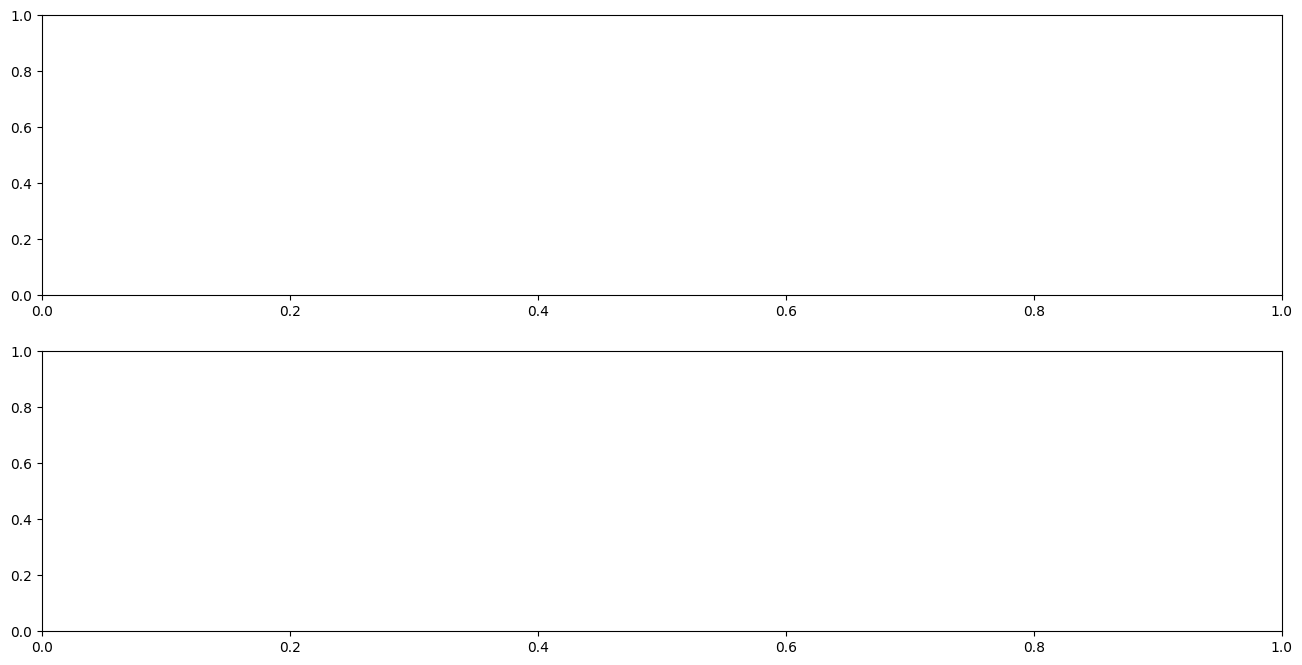

In [26]:
"""Den her boks er overhovedet ikke rigtig. Det er lige work in progress for Pernille og mig ;)"""

N_exp = len(exp_all)
N_measurements = 5


x_data = np.array([0.5, 1.0, 1.5, 2.0, 2.5])

Ball_Chi2 = np.zeros(N_exp)
Ball_Prob = np.zeros(N_exp)

for iexp in range(N_exp):
    exp_1_results_t = results_t[iexp]


    chi2_object = Chi2Regression(quadratic_model, exp_1_results_t, exp_1_results_s)
    m = Minuit(chi2_object, a=7.5, b=2, c=1)
    m.migrad()

    Chi2Qua = m.fval # the chi2 value
    NvarQua = 3                      # Number of variables (a, b and c)
    NdofQua = N_measurements - NvarQua   # Number of degrees of freedom
    ProbQua =  stats.chi2.sf(Chi2Qua, NdofQua) # The chi2 probability given N_DOF degrees of freedom
    
    Ball_Chi2[iexp] = Chi2Qua
    Ball_Prob[iexp] = ProbQua
    
    fig, ax = plt.subplots(nrows=2,figsize=(16, 8))
    #ax[0].errorbar(x_data, exp_1_results_s[iexp],0.033, fmt='ro', ecolor='k', elinewidth=1, capsize=2, capthick=1)
    ax[0].plot(x_data, quadratic_model(x_data, *m.values[:]), '-r')
    
    d = {'a': [m.values['c'], m.errors['c']],
    'b': [m.values['b'], m.errors['b']],
    'c':    [m.values['a'], m.errors['a']],
    'Chi2':     Chi2Qua,
    'ndf':      NdofQua,
    'Prob':     ProbQua,
    }
    
    text = nice_string_output(d, extra_spacing=2, decimals=3)
    add_text_to_ax(0.04, 0.95, text, ax[0], fontsize=20)
    fig.tight_layout()


# Error propagation mm

In [ ]:
# For both the pendulum and the ball on incline, we have the following 
# variables: L, T, a, R, d
# The value and the uncertainty for each variable is defined here:

muL = 1.0
sigL = 1.0
muT = 1.0
sigT = 1.0
mua = 1.0
siga = 1.0
muR = 1.0
sigR = 1.0
mud = 1.0
sigd = 1.0
muA = 1.0           # A for angle
sigA = 1.0

# Define experiment: pendulum or incline
mode = 'incline'

In [ ]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LateX using Ipython dysplay system
     
      Parameters
    --------------
    args : tuple
        What to print (in LateX math mode)
    kwargs : dict
        optional keywords to pass to 'display'
     """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    

In [ ]:
# Ipmort SymPy
from sympy import *

# Define variables and print
L,T,a,R,d,A,g = symbols("L, T, a, R, d, A, g")
dL,dT,da,dR,dd,dA,dg = symbols("sigma_L, sigma_T, sigma_a, sigma_R, sigma_d, sigma_A, sigma_g")

# Pendulum and incline
# Define relation

if mode == 'pendulum':
# Pendulum
    g = L*((2*pi)/T)**2
if mode == 'incline':
# Incline
    g = (a/sin(A+A))*(1+(2/5)*(R**2/(R**2-(d/2)**2)))

lprint(latex(Eq(symbols('g'), g)))


In [ ]:
# Calculate uncertainty and print
# Pendulum
if mode == 'pendulum':
    dg = sqrt((g.diff(L)*dL)**2 + (g.diff(T)*dT)**2)
# Incline
if mode == 'incline':
    dg = sqrt((g.diff(a)*da)**2 + (g.diff(A)*dA)**2 + (g.diff(R)*dR)**2 + (g.diff(d)*dd)**2)

# Turn expression into numerical functions
if mode == 'pendulum':
    fg = lambdify((L,T), g)
    fdg = lambdify((L,dL,T,dT),dg)

if mode == 'incline':
    fg = lambdify((a,A,R,d), g)
    fdg = lambdify((a,da,A,dA,R,dR,d,dd),dg)

# Define values and their errors
vL, vdL = muL, sigL
vT, vdT = muT, sigT
va, vda = mua, siga
vR, vdR = muR, sigR
vd, vdd = mud, sigd
vA, vdA = muA, sigA

# Numerically evaluate expressions and print
if mode == 'pendulum':
    vg = fg(vL,vT)
    vdg = fdg(vL,vdL,vT,vdT)
if mode == 'incline':
    vg = fg(va,vA,vR,vd)
    vdg = fdg(va,vda,vA,vdA,vR,vdR,vd,vdd)

lprint(fr'g = ({vg:.1f} \pm {vdg:.1f})\,\mathrm{{m}}')